# Análisis muestral a la predicción poblacional

Primero, cargamos el conjunto de datos "mtcars" en R:

In [1]:
data(mtcars)

A continuación, creamos dos subconjuntos de datos: uno que incluye solo los automóviles con transmisión automática y otro que incluye solo los automóviles con transmisión manual:

In [2]:
auto <- subset(mtcars, am == 1)
manual <- subset(mtcars, am == 0)

Ahora, calculamos el consumo de gasolina promedio para cada subconjunto:

In [3]:
mean(auto$mpg)
mean(manual$mpg)

[1] 24.39231

[1] 17.14737

Cálculo de la diferencia de medias observada entre los dos grupos

In [4]:
diff_obs <- mean(auto$mpg) - mean(manual$mpg)
diff_obs

[1] 7.244939

Cálculo del error estándar de la diferencia de medias

In [5]:
se_diff <- sqrt(var(auto$mpg) / length(auto$mpg) + var(manual$mpg) / length(manual$mpg))
se_diff

[1] 1.923202

### Definir las hipótesis nula y alternativa

In [6]:
hipotesis_nula <- "El consumo de gasolina promedio de los automóviles con transmisión automática es igual o menor que el consumo de gasolina promedio de los automóviles con transmisión manual."
hipotesis_alternativa <- "El consumo de gasolina promedio de los automóviles con transmisión automática es mayor que el consumo de gasolina promedio de los automóviles con transmisión manual"

### Definir el nivel de significancia

In [7]:
nivel_significancia <- 0.05

### Contraste de hipótesis

In [8]:
t.test(auto$mpg, manual$mpg, alternative = "greater", var.equal = FALSE)


	Welch Two Sample t-test

data:  auto$mpg and manual$mpg
t = 3.7671, df = 18.332, p-value = 0.0006868
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 3.913256      Inf
sample estimates:
mean of x mean of y 
 24.39231  17.14737 


### Calcular el valor crítico

In [9]:
# Calcular el estadístico t
t_stat <- (mean(auto$mpg) - mean(manual$mpg)) / sqrt(var(auto$mpg)/length(auto$mpg) + var(manual$mpg)/length(manual$mpg))

# Calcular los grados de libertad
df <- length(auto$mpg) + length(manual$mpg) - 2

# Calcular el valor crítico para un nivel de significancia del 5%
t_crit <- qt(0.025, df)

# Imprimir los resultados
cat("Estadístico t:", t_stat, "\n")
cat("Grados de libertad:", df, "\n")
cat("Valor crítico:", t_crit, "\n")

Estadístico t: 3.767123 
Grados de libertad: 30 
Valor crítico: -2.042272 


In [10]:
promedio_auto <- mean(auto$mpg[1:7])
promedio_manual <- mean(manual$mpg[1:7])

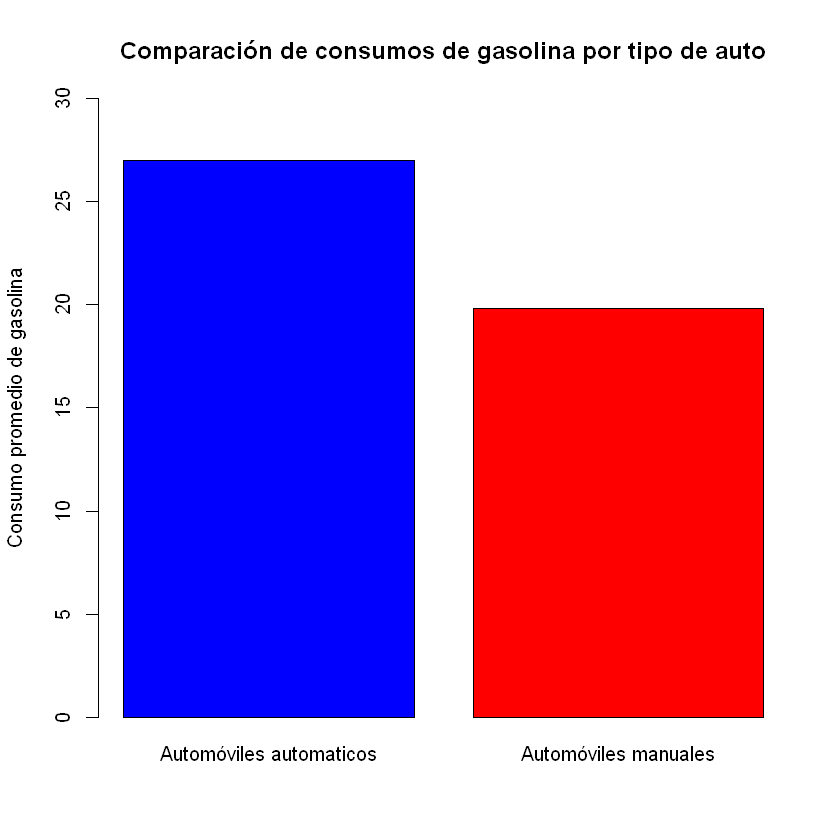

In [11]:
barplot(c(promedio_auto, promedio_manual), 
        names.arg = c("Automóviles automaticos", "Automóviles manuales"),
        ylab = "Consumo promedio de gasolina", 
        ylim = c(0, 30),
        col = c("blue", "red"),
        main = "Comparación de consumos de gasolina por tipo de auto")

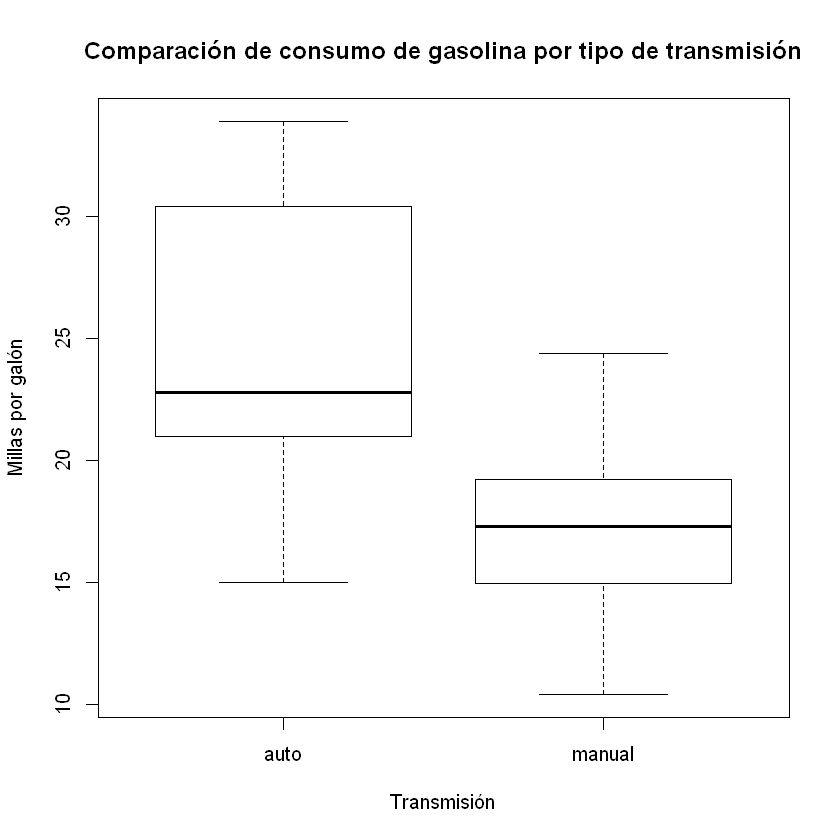

In [12]:
# Crear un vector combinado con los dos subconjuntos de datos
mpg <- c(auto$mpg, manual$mpg)

# Crear un vector de factores que indica el tipo de transmisión
am <- factor(c(rep("auto", length(auto$mpg)), rep("manual", length(manual$mpg))))

# Crear un diagrama de cajas con la función boxplot() de R base
boxplot(mpg ~ am, xlab = "Transmisión", ylab = "Millas por galón",
        main = "Comparación de consumo de gasolina por tipo de transmisión")


# Conclusión

In [13]:
# Cálculo del estadístico t y el valor p del contraste de hipótesis
t_stat <- diff_obs / se_diff
p_val <- 2 * pt(abs(t_stat), df = length(auto$mpg) + length(manual$mpg) - 2, lower.tail = FALSE)

# Evaluación de la hipótesis nula y decisión del contraste de hipótesis
if (p_val < nivel_significancia) {
  cat("Se rechaza la hipótesis nula; hay evidencia suficiente para afirmar que los consumos de gasolina promedio de los dos grupos son diferentes.\n")
} else {
  cat("No se rechaza la hipótesis nula; no hay suficiente evidencia para afirmar que los consumos de gasolina promedio de los dos grupos son diferentes.\n")
}

Se rechaza la hipótesis nula; hay evidencia suficiente para afirmar que los consumos de gasolina promedio de los dos grupos son diferentes.
